**Part 1 - Importing the Library**

The main libraries that are used are tensorflow2, keras , numpy and pandas.


In [9]:
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

**Part 2 - Importing the data**

The data is stored in a json file, which can be imported and used as a pandas dataframe. This data was manually created by me. hence, it's not that big.
we all know that deep learning requires large chunks of data. but, That is not the case here. I have utilized a neural network architecture powerful enough to handle this small amount of data.

***2.1 - Importing the dataset***

In [10]:
with open('content_copy.json') as content:
  data1 = json.load(content)

***2.2 - Getting all the data to lists***

In [11]:
tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

***2.3 - Converting to dataframe***

In [12]:
data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

***2.4- Printing the data***

In [13]:
data


,inputs,tags
0,hello,greeting
1,hi there,greeting
2,nice to meet you,greeting
3,"hi, is this is Abida's group",greeting
4,anyone here ?,greeting
...,...,...
67,where is the Abida's group center located ?,whereisthecenter
68,location of the Abida's group center ?,whereisthecenter
69,Abida's group center's location ?,whereisthecenter
70,where can I find the Abida's group center ?,whereisthecenter


In [14]:
data = data.sample(frac=1)

**Part 3 - Pre-Processing**

Important pre-processing such as removing the punctuations, converting to lowercase, encoding the textual data to numerical data are done.



***3.1 - Removing punctuations***

In [15]:
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
24,i will catch up later,goodbye
4,anyone here,greeting
23,i will catch you later,goodbye
25,okay i will see you later,goodbye
55,you are from where,whereareyou
...,...,...
48,which country are you from,whereareyou
43,your name,whoareyou
40,what is your name,whoareyou
38,who are you,whoareyou


***3.2 - Tokenize the data***

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

***3.3 - Apply padding***

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

***3.4 - Encoding the outputs***

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

***3.5 - Tensorflow's tokenizer assigns a unique token to each distinct word. and padding is done to get all the data to the same length so as to send it to an rnn layer***

In [19]:
input_shape = x_train.shape[1]
print(input_shape)

8


***3.6 - Define vocabulary***

In [20]:
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  77
output length:  7


**Part 4 - Neural Network**

The Network consist of an embedding layer which is one of the most powerful things in the field of natural language processing. the outputs of the embedding layer is the input of the reccurent layer with lstm gate. then, the output is flattened and a regular dense layer is used with a softmax activation function.

The main part is the embedding layer which gives has a corresponding vector for each word in the dataset.

***4.1 - Creating the model***

In [21]:
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(10,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

***4.2 - Compiling the model***

In [22]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


***4.3 - Training the model***

In [23]:
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
3/3 [==============================] - 2s 7ms/step - loss: 1.9499 - accuracy: 0.1528
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 1.9455 - accuracy: 0.1250
Epoch 3/200
3/3 [==============================] - 0s 7ms/step - loss: 1.9414 - accuracy: 0.1389
Epoch 4/200
3/3 [==============================] - 0s 7ms/step - loss: 1.9379 - accuracy: 0.1528
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 1.9345 - accuracy: 0.1806
Epoch 6/200
3/3 [==============================] - 0s 7ms/step - loss: 1.9309 - accuracy: 0.2500
Epoch 7/200
3/3 [==============================] - 0s 6ms/step - loss: 1.9273 - accuracy: 0.2500
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 1.9237 - accuracy: 0.2361
Epoch 9/200
3/3 [==============================] - 0s 6ms/step - loss: 1.9196 - accuracy: 0.2222
Epoch 10/200
3/3 [==============================] - 0s 7ms/step - loss: 1.9148 - accuracy: 0.2222
Epoch 11/200
3/3 [===========

**Part 5 - Model Analysis**

The model got a perfect accuracy of 100%.

***5.1 - Plotting model accuracy***

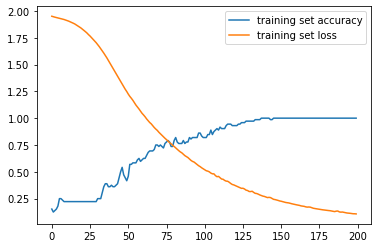

In [24]:
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

**Part 6 - Testing**

I have also tested the model in a way to mimic a human interacting with a bot and got positive results. however, This was very simple because of the tiny amount of data that I have created. but, the same model can also be used with large amount of data.

In [26]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Abida's Bot : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

You : bye
Abida's Bot :  Take care


**Part 7 - Conclusion**

This is the Chatbot that I have created with tensorflow2 utilizing the power of embedding matrix.